# Seminar: Decision Trees Bootstrap Aggregation (Bagging) and AdaBoost

Machine Learning by professor Evgeny Burnaev

Author: Egor Shvetsov


## Contensts:
- Decision trees
- Bagging
- AdaBoost

In [ ]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

font = {'size'   : 12}
plt.rc('font', **font)
label_font_size = 12

np.random.seed(4242)

## We start by creating some data, which can be expressed as:

<center> $y=f(x)+ϵ$ and $ϵ$~$\mathbf{N}(0,1)$ </center>

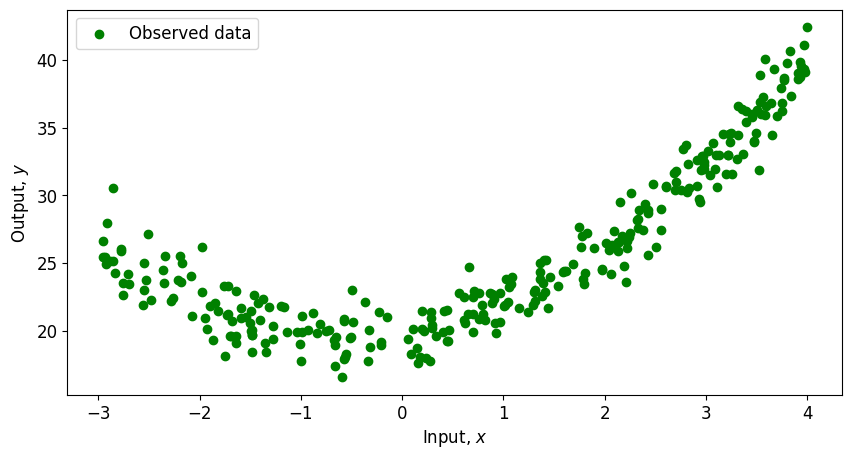

In [ ]:
def f(x):
    mu, sigma = 0, 1.5
    return x**2 + x  + 20 + np.random.normal(mu, sigma, 1)

num_points = 300

x = np.random.uniform(-3, 4, num_points)
y = np.array( [f(i) for i in x] ).flatten()

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Observed data', color='g')
plt.xlabel('Input, $x$', fontsize=label_font_size)
plt.ylabel('Output, $y$', fontsize=label_font_size)
plt.legend();

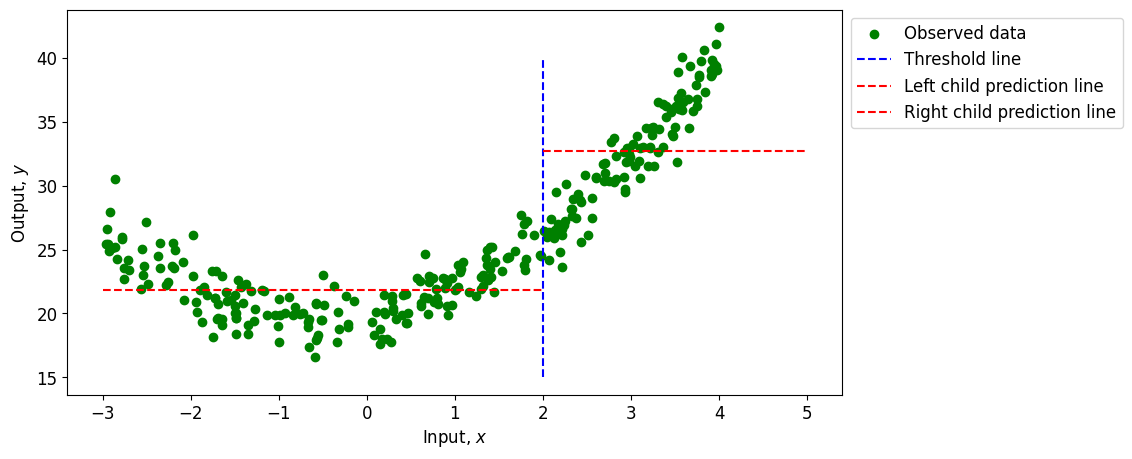

In [ ]:
threshold = 2

low = np.take(y, np.where(x < threshold))
high = np.take(y, np.where(x > threshold))


plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Observed data', color='g')

plt.plot([threshold]*2, [15, 40], 'b--', label = 'Threshold line')

plt.plot([-3, threshold], [low.mean()]*2, 'r--', label = 'Left child prediction line')
plt.plot([threshold, 5], [high.mean()]*2, 'r--', label = 'Right child prediction line')
plt.xlabel('Input, $x$', fontsize=label_font_size)
plt.ylabel('Output, $y$', fontsize=label_font_size)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [ ]:
# YOUR TASK  HERE IS TO COMPUTE MEAN VALUES FOR Y in LEFT AND RIGHT SIDES

left = low = np.take(y, np.where(x < threshold))
right = np.take(y, np.where(x > threshold))

mean_left = left.mean()
mean_right = right.mean()

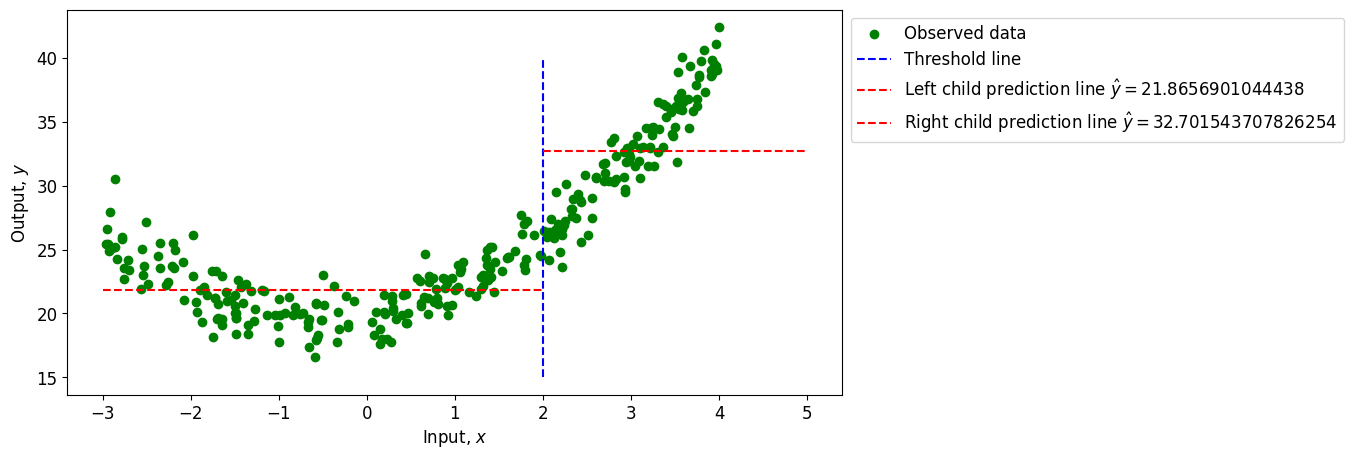

In [ ]:
threshold = 2

low = np.take(y, np.where(x < threshold))
high = np.take(y, np.where(x > threshold))


plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Observed data', color='g')
plt.plot([threshold]*2, [15, 40], 'b--', label = 'Threshold line')

plt.plot([-3, threshold], [low.mean()]*2, 'r--', label = 'Left child prediction line $\hat{y}=$'+f'{mean_left}')
plt.plot([threshold, 5], [high.mean()]*2, 'r--', label = 'Right child prediction line $\hat{y}=$'+f'{mean_right}')
plt.xlabel('Input, $x$', fontsize=label_font_size)
plt.ylabel('Output, $y$', fontsize=label_font_size)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

# Let's define a strategy to split our data into two parts with some criterion?

**Your ideas for the criterion:**
- What criterion can we use?
- Wha do we want to minimize?


<hr>

Let's do sum of squares residuals: $ssr = \sum_i(y_i - \hat{y} )^2$

In [ ]:
def ssr(y, y_mean):
    return ((y-y_mean)**2).sum()


# YOUR TASK  HERE IS TO COMPUTE A FUNCTION WHICH FINDS THRESHOLD WHICH CORRESPONDS TO A MINIMAL SPLIT IN TERMS OF SSR

def find_threshold(y,x):
    ssr_list, thresholds = [], []

    for i in range(len(x) - 1):
        threshold = x[i:i+2].mean()

        low = np.take(y, np.where(x < threshold)).flatten()
        high = np.take(y, np.where(x > threshold)).flatten()

        guess_low = low.mean()
        guess_high = high.mean()

        # ADD ONE LINE OF CODE HERE
        ssr_list.append(ssr(low, guess_low) + ssr(high, guess_high))

        thresholds.append(threshold)
        min_ts =thresholds[ssr_list.index(min(ssr_list))]

    return min_ts, ssr_list, thresholds

In [ ]:
min_ts, ssr_list, thresholds = find_threshold(y,x)

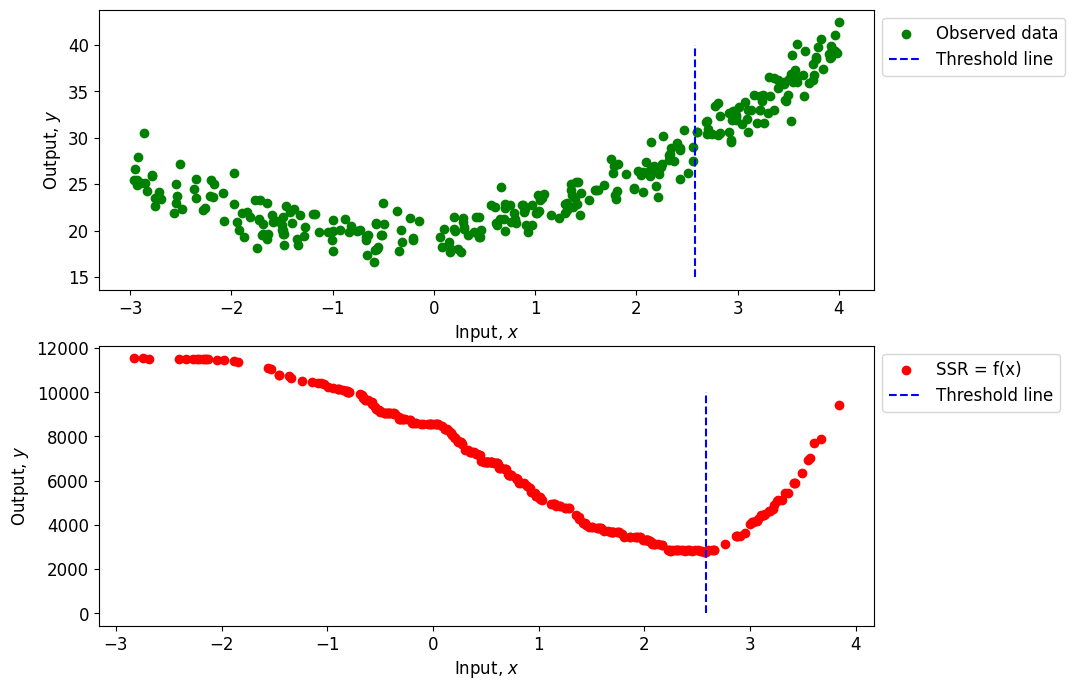

In [ ]:
f, ax = plt.subplots(2,1, figsize=(10, 8))
ax[0].scatter(x, y, label='Observed data', color='g')
ax[0].plot([min_ts]*2, [15, 40], 'b--', label = 'Threshold line')
ax[1].scatter(thresholds, ssr_list, label='SSR = f(x)', color='r')
ax[1].plot([min_ts]*2, [15, 10000], 'b--', label = 'Threshold line')

ax[0].set_xlabel('Input, $x$', fontsize=label_font_size)
ax[0].set_ylabel('Output, $y$', fontsize=label_font_size)

ax[1].set_xlabel('Input, $x$', fontsize=label_font_size)
ax[1].set_ylabel('Output, $y$', fontsize=label_font_size)

ax[0].legend(loc="upper left", bbox_to_anchor=(1,1))
ax[1].legend(loc="upper left", bbox_to_anchor=(1,1))

# Below we will implement a so called decision stump, which repeats itself **recursively**  and therefore the tree growth. Each stump will use our function to find a splitting criterion.

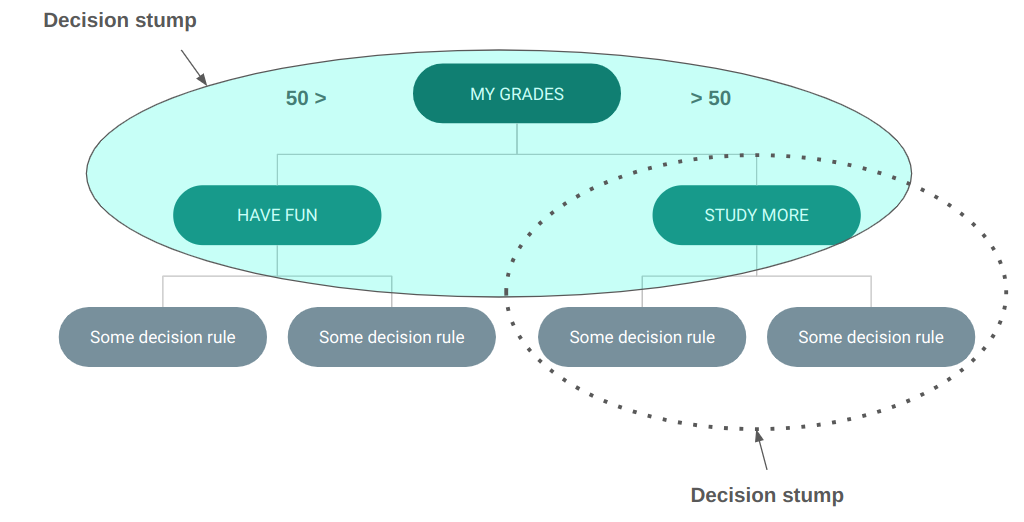

In [ ]:
df = pd.DataFrame(zip(x, y.squeeze()), columns = ['x', 'y'])

class Stump():
    def __init__(self, threshold, pred):
        self.threshold = threshold
        self.pred = pred
        self.left = None
        self.right = None
        self.depth = 0

def create_nodes(tree, df, stop, max_depth):
    low = df[df.x <= tree.threshold]
    high = df[df.x > tree.threshold]

    if tree.depth < max_depth:

        if len(low) > stop:
            threshold, _ , _ = find_threshold(low.y.values, low.x.values)
            tree.left = Stump(threshold, low.y.mean())
            tree.left.depth = tree.depth + 1
            create_nodes(tree.left, low, stop, max_depth)

        if len(high) > stop:
            threshold, _, _ = find_threshold(high.y.values, high.x.values)
            tree.right = Stump(threshold, high.y.mean())
            tree.right.depth = tree.depth + 1
            create_nodes(tree.right, high, stop, max_depth)



def create_tree(data, max_depth):
    threshold, _, _ = find_threshold(data.y.values,data.x.values)
    tree = Stump(threshold, data.y.mean())
    create_nodes(tree, df, 10, max_depth)
    return tree


tree = create_tree(data=df, max_depth=6)

# Plot some of the obtained decision boundaries

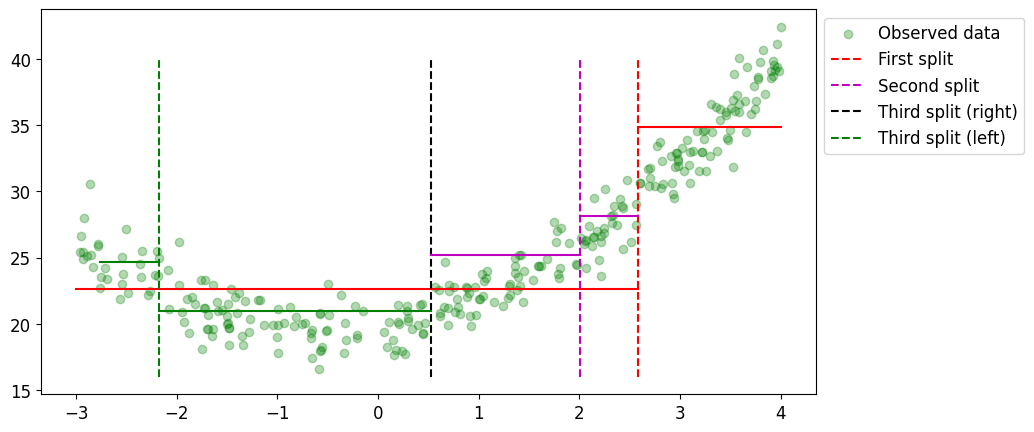

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Observed data', color='g', alpha=0.3)


plt.plot([tree.threshold]*2, [16, 40], 'r--',
         label = 'First split')


plt.plot([tree.threshold, 4],
         [tree.right.pred]*2,
          'r', )


plt.plot([tree.threshold,-3],
         [tree.left.pred]*2,
          'r', )

plt.plot([tree.left.right.left.threshold]*2, [16, 40], 'm--',
         label = 'Second split')

plt.plot([tree.left.left.right.threshold]*2, [16, 40], 'k--',  label = 'Third split (right)')


plt.plot([tree.threshold, tree.left.right.left.threshold],
         [tree.left.right.right.pred]*2,
         'm',)

plt.plot([tree.left.left.right.threshold, tree.left.right.left.threshold],
         [tree.left.right.left.left.pred]*2,
         'm')


plt.plot([tree.left.left.threshold]*2, [16, 40], 'g--',
         label = 'Third split (left)')

plt.plot([tree.left.left.threshold, tree.left.left.left.threshold],
         [tree.left.left.left.pred]*2,
         'g')


plt.plot([tree.left.left.threshold, tree.left.left.right.threshold],
         [tree.left.left.right.pred]*2,
         'g')


plt.legend(loc="upper left", bbox_to_anchor=(1,1))

# Let's plot predictions for trees of different depth

In [ ]:
def predict(x, tree):
    curr_node = tree
    result = None
    while True:
        if x <= curr_node.threshold:
            if curr_node.left: curr_node = curr_node.left
            else:
                break
        elif x > curr_node.threshold:
            if curr_node.right: curr_node = curr_node.right
            else:
                break

    return curr_node.pred

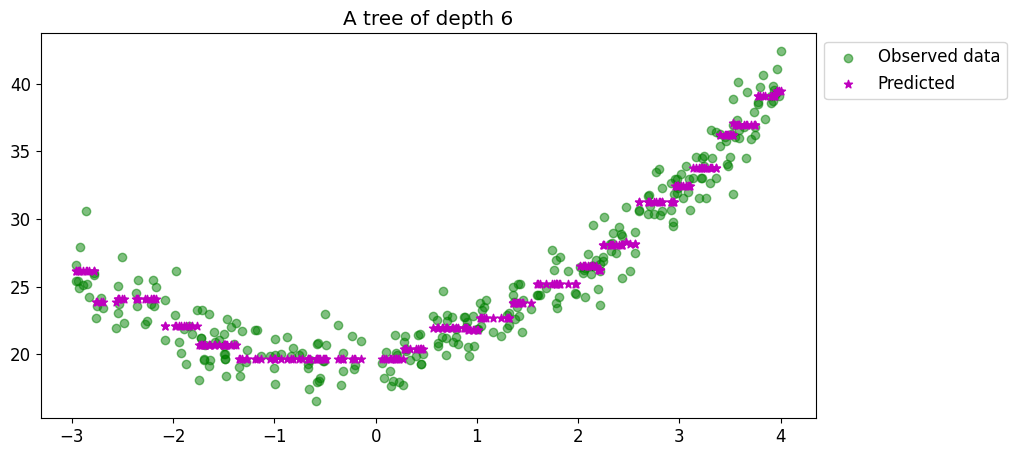

In [ ]:
predictons = []

for x_i in x:
    predictons.append(predict(x_i, tree))


plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Observed data', color='g', alpha=0.5)
plt.scatter(x, predictons, label='Predicted', color='m', marker='*')

plt.title('A tree of depth 6')
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

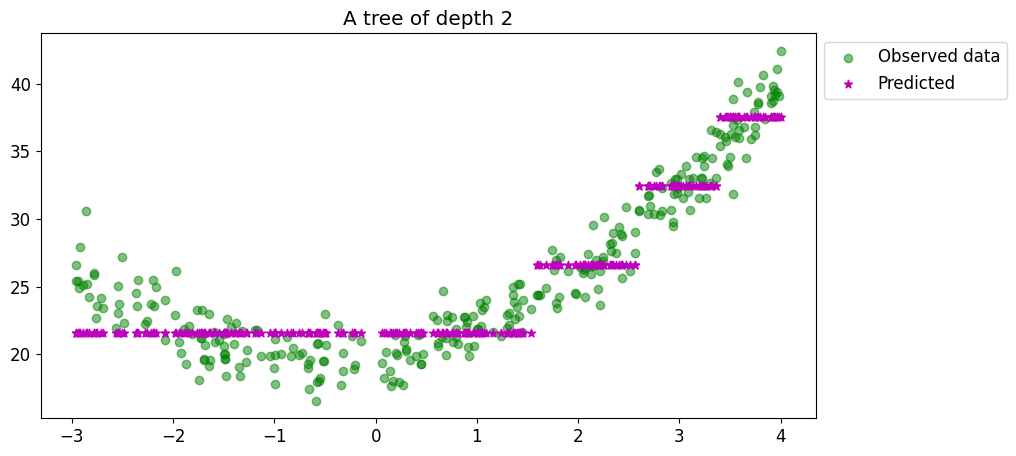

In [ ]:
tree = create_tree(data=df, max_depth=2)


predictons = []
for x_i in x:
    predictons.append(predict(x_i, tree))


plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Observed data', color='g', alpha=0.5)
plt.scatter(x, predictons, label='Predicted', color='m', marker='*')

plt.title('A tree of depth 2')
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

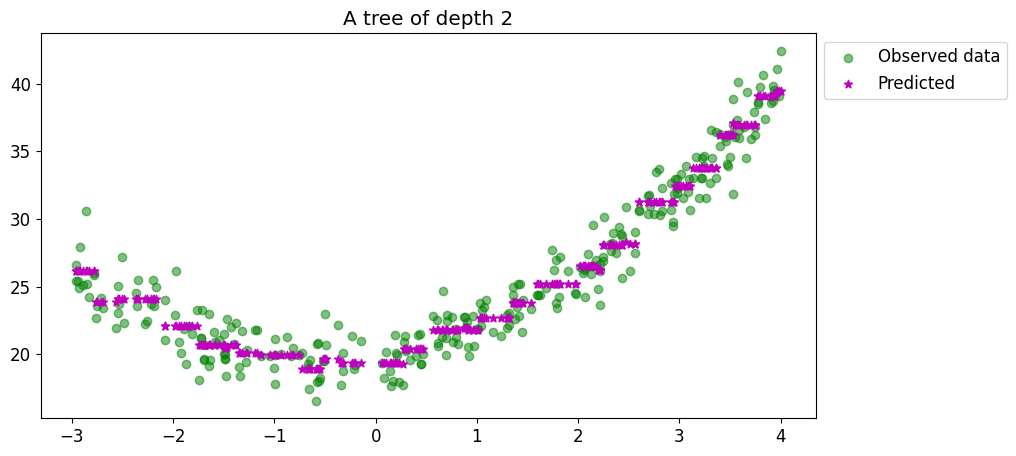

In [ ]:
tree = create_tree(data=df, max_depth=10)


predictons = []
for x_i in x:
    predictons.append(predict(x_i, tree))


plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Observed data', color='g', alpha=0.5)
plt.scatter(x, predictons, label='Predicted', color='m', marker='*')

plt.title('A tree of depth 2')
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

## Questions

- How these model differes from a linear model?
- Which one is better?
- How to improve predictions?
- What happens if we have more than 1 features?
- What depth of the model we need?

# Now let's see how Bagging or "Bootstrap Averaging" works


In [ ]:
numebr_of_weak_learners = 20
max_depth = 4
boostrap_sample = 0.6

trees = []

for i in range(numebr_of_weak_learners):
    data = df.sample(frac=boostrap_sample)
    trees.append(create_tree(data,max_depth=max_depth))

In [ ]:
predictons = []

for x_i in x:

    m = 0
    for i in range(numebr_of_weak_learners):
        m += predict((x_i),trees[i])/numebr_of_weak_learners

    predictons.append(m)


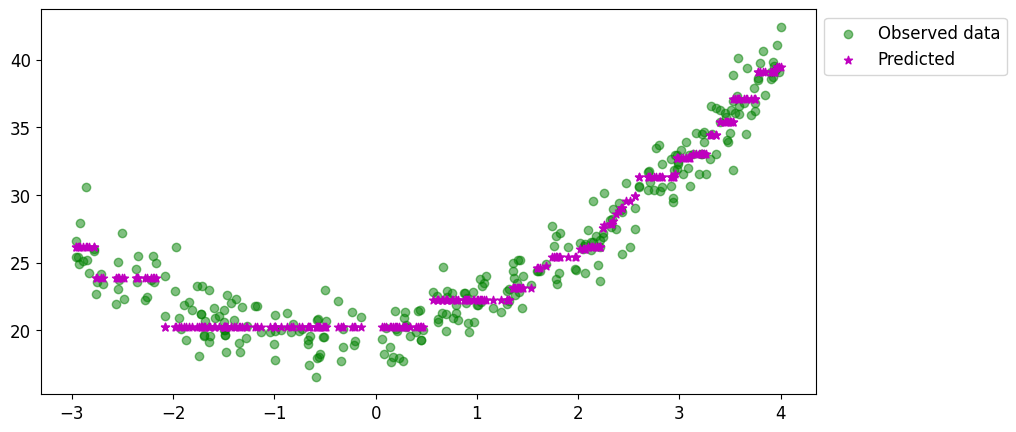

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Observed data', color='g', alpha=0.5)
plt.scatter(x, predictons, label='Predicted', color='m', marker='*')

plt.legend(loc="upper left", bbox_to_anchor=(1,1));

# Now let's plot decision boundaries for 2D case

Now we will be using a solution from sklearn

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 800x800 with 0 Axes>

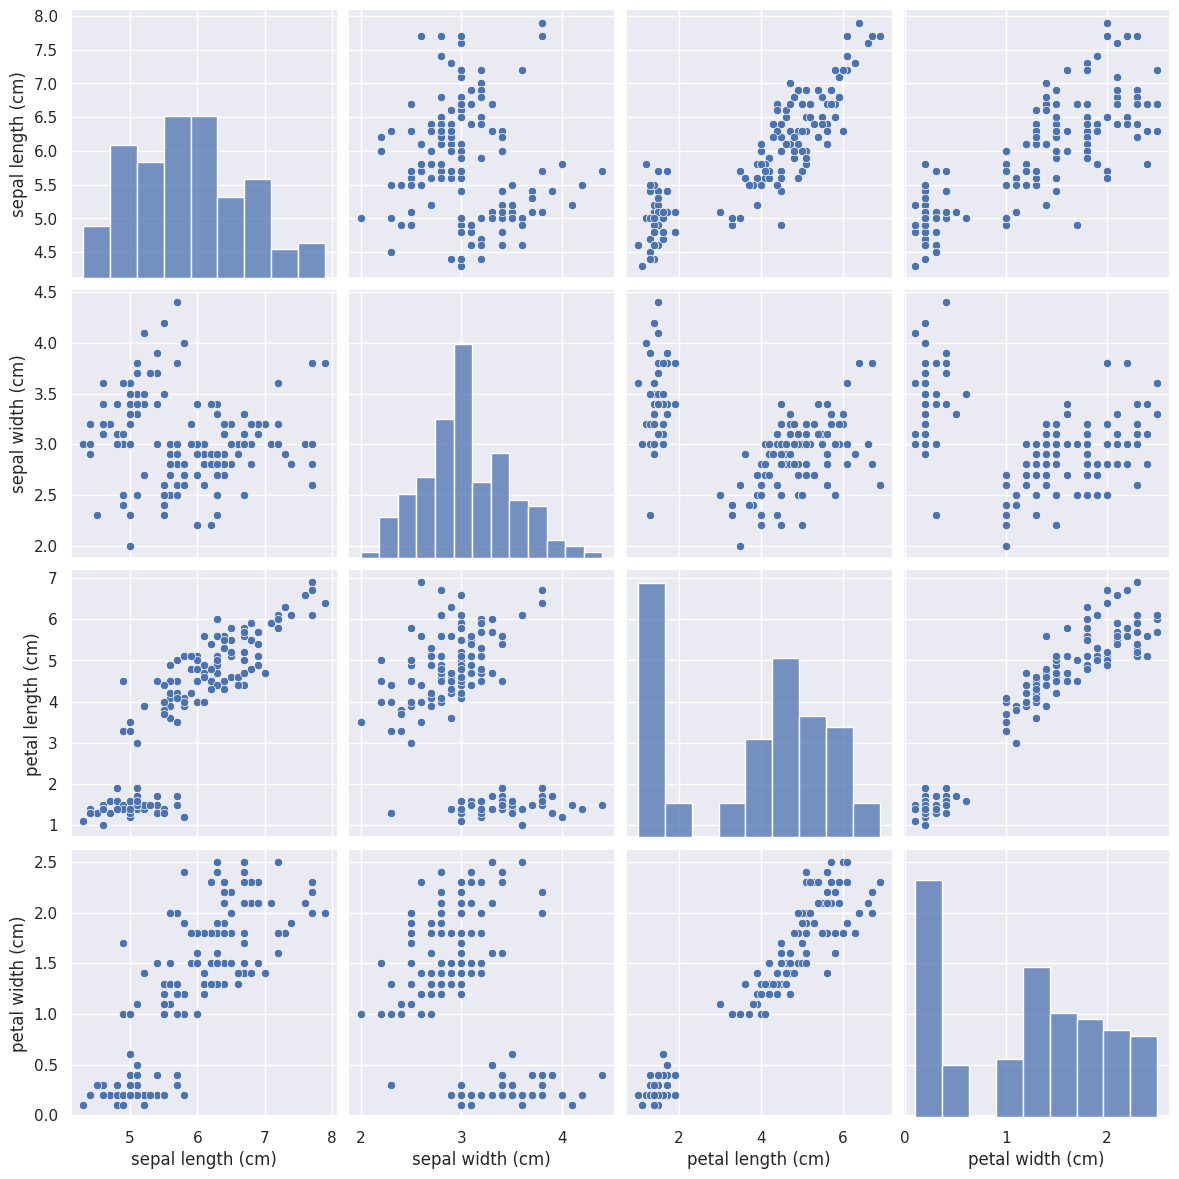

In [ ]:
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()

pd_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])


plt.figure(figsize=(8,8))
sns.pairplot(pd_iris.drop('target', axis=1), size=3)
plt.show();

# In this example we will use a model from sklearn

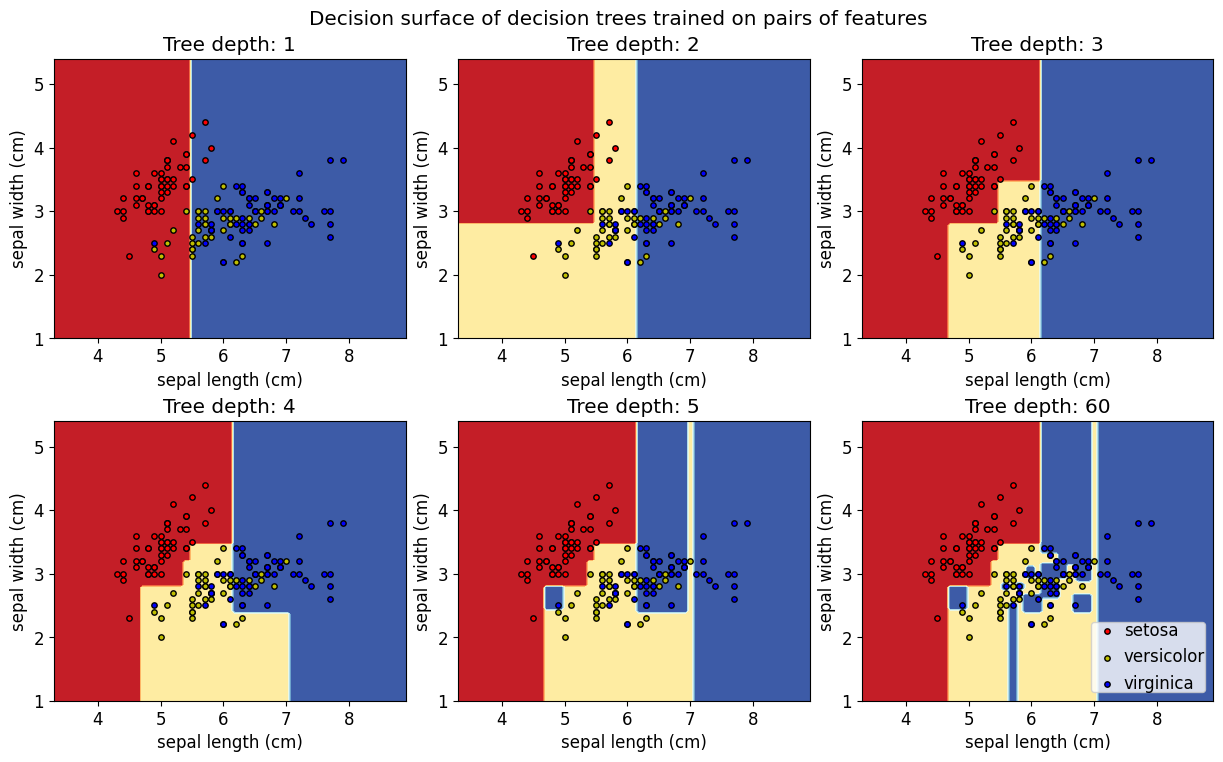

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


plt.figure(figsize=(13, 8))

pair = [0,1]
idx = 0

for idx, depth in enumerate([1,2,3,4,5,60]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(max_depth=depth).fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, idx + 1)
    ax.set_title(f'Tree depth: {depth}')
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            #cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features");
plt.legend(loc="lower right", borderpad=0, handletextpad=0);
_ = plt.axis("tight");

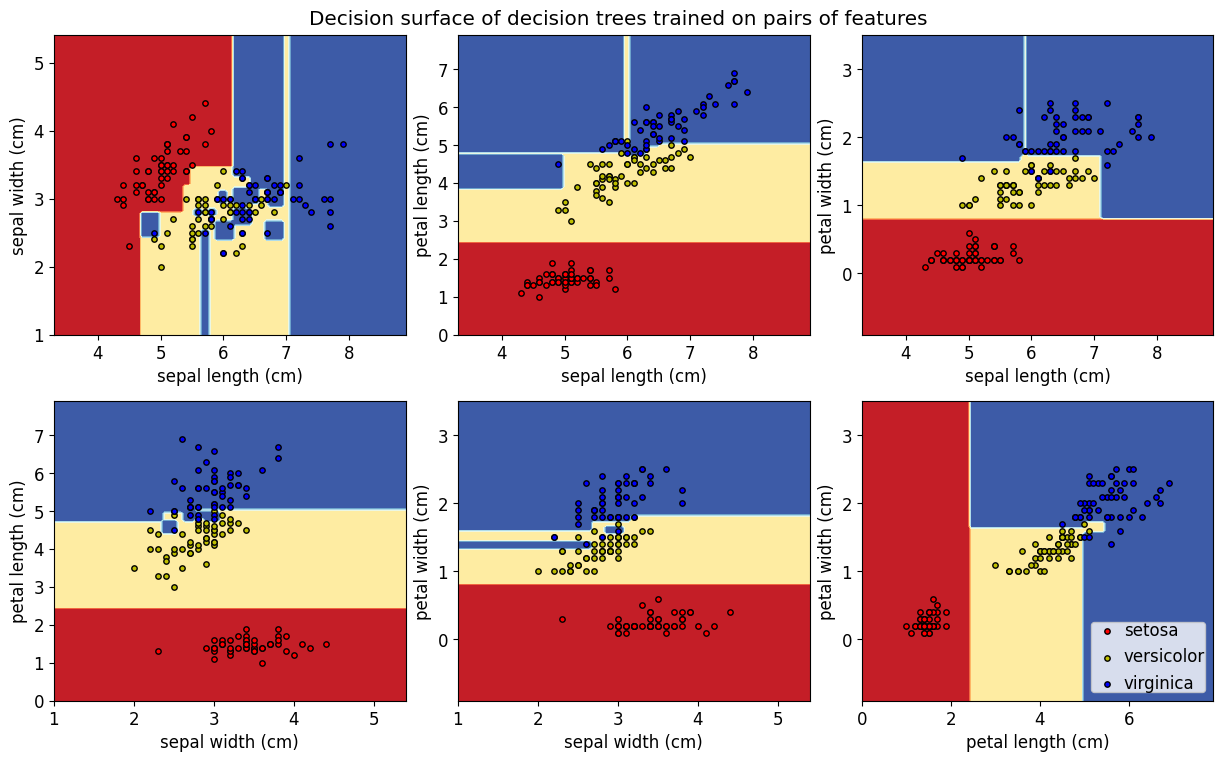

In [ ]:
plt.figure(figsize=(13, 8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            #cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features");
plt.legend(loc="lower right", borderpad=0, handletextpad=0);
_ = plt.axis("tight");

# Adaboost

In this section we will study how Adaboost alghorithm works in practice and implement it ourselves

In [ ]:
import math
import matplotlib
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, mean_absolute_error, mean_squared_error, f1_score

random_state = 10

## Boosting

The underlying idea of boosting is to combine **cheap - weak** predictiors into a strong **powerful ensemble**.

![](https://www.researchgate.net/profile/Eiji_Hato/publication/264713074/figure/fig5/AS:614118558023749@1523428682764/Concept-of-AdaBoost.png)

### AdaBoost pseudo code

<img src=https://statchaitya.github.io/images/adaboostm1.png>


## Define one Stump

In [ ]:
# Decision stump used as weak classifier in this impl. of Adaboost
class DecisionStump():
    def __init__(self):
        # Determines if sample shall be classified as -1 or 1 given threshold
        self.polarity = 1
        # The index of the feature used to make classification
        self.feature_index = None
        # The threshold value that the feature should be measured against
        self.threshold = None
        # Value indicative of the classifier's accuracy
        self.alpha = None

# AdaBoost model

In this part you will need to finish Adaboost alghorithm

In [ ]:
class Adaboost():
    """Boosting method that uses a number of weak classifiers in
    ensemble to make a strong classifier. This implementation uses decision
    stumps, which is a one level Decision Tree.
    Parameters:
    -----------
    n_clf: int
        The number of weak classifiers that will be used.
    """
    def __init__(self, n_estimators=5):
        self.n_estimators = n_estimators

    def fit(self, X, y):
        n_samples, n_features = np.shape(X)

        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))
        self.w = 0

        self.clfs = []
        # Iterate through classifiers
        for _ in range(self.n_estimators):
            clf = DecisionStump()
            # Minimum error given for using a certain feature value threshold
            # for predicting sample label
            min_error = float('inf')
            # Iterate throught every unique feature value and see what value
            # makes the best threshold for predicting y
            for feature_i in range(n_features):
                feature_values = np.expand_dims(X[:, feature_i], axis=1)
                unique_values = np.unique(feature_values)
                # Try every unique feature value as threshold
                for threshold in unique_values:
                    p = 1
                    # Set all predictions to '1' initially
                    prediction = np.ones(np.shape(y))
                    # Label the samples whose values are below threshold as '-1'
                    prediction[X[:, feature_i] < threshold] = -1


                    # Error = sum of weights of misclassified samples
                    # Here, we pay more attentin to the weights, which are important (misclassified the most) for us from the previous iteration
                    error = sum(w[y != prediction])

                    # If the error is over 50% we flip the polarity so that samples that
                    # were classified as 0 are classified as 1, and vice versa
                    # E.g error = 0.8 => (1 - error) = 0.2
                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # If this threshold resulted in the smallest error we save the
                    # configuration
                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_index = feature_i
                        min_error = error

            # Calculate the alpha which is used to update the sample weights,
            # Alpha is also an approximation of this classifier's proficiency

            # TODO your code here, compute alpha Pseudo code step C:
            clf.alpha = 0.5 * math.log((1.0 - min_error) / (min_error + 1e-10))
            # END of your code


            # Set all predictions to '1' initially
            predictions = np.ones(np.shape(y))
            # The indexes where the sample values are below threshold
            negative_idx = (clf.polarity * X[:, clf.feature_index] < clf.polarity * clf.threshold)
            # Label those as '-1'
            predictions[negative_idx] = -1
            # Calculate new weights
            # Missclassified samples gets larger weights and correctly classified samples smaller


            # TODO your code here, update sample weights - Pseudo code step D
            w *= np.exp(-clf.alpha * y * predictions)
            # END of the code

            # Normalize to one
            w /= np.sum(w)

            self.w = w
            # Save classifier
            self.clfs.append(clf)

    def predict(self, X):
        n_samples = np.shape(X)[0]
        y_pred = np.zeros((n_samples, 1))
        # For each classifier => label the samples
        for clf in self.clfs:
            # Set all predictions to '1' initially
            predictions = np.ones(np.shape(y_pred))
            # The indexes where the sample values are below threshold
            negative_idx = (clf.polarity * X[:, clf.feature_index] < clf.polarity * clf.threshold)
            # Label those as '-1'
            predictions[negative_idx] = -1
            # Add predictions weighted by the classifiers alpha
            # (alpha indicative of classifier's proficiency)
            y_pred += clf.alpha * predictions

        # Return sign of prediction sum
        y_pred = np.sign(y_pred).flatten()

        return y_pred

In [ ]:

def scikit_example(n_samples, random_state=None):
    X1, y1 = make_gaussian_quantiles(cov=2., n_samples=int(0.4*n_samples),
                                     n_features=2, n_classes=2,
                                     random_state=random_state)
    X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                     n_samples=int(0.6*n_samples),
                                     n_features=2, n_classes=2,
                                     random_state=random_state)
    return np.concatenate((X1, X2)), np.concatenate((y1, 1 - y2))


def plot_adaboost(adaboost=None):
    colors = ['blue', 'green' , 'red']

    ax = plt.figure(figsize=(6, 6)).add_subplot(111)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=matplotlib.colors.ListedColormap(colors))

    if adaboost:
        prob_ = adaboost.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        ax.contourf(xx, yy, prob_, alpha=0.4, cmap=plt.cm.coolwarm)
        ax.set_title("AdaBoost with %d trees"%(adaboost.n_estimators,));

In [ ]:
X, y = scikit_example(n_samples=1000, random_state=random_state)


## Set label values as inteded

y[y == 0] = -1
y[y == 1] = 1

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, random_state=random_state)

min_, max_ = np.min(X, axis=0) - 1, np.max(X, axis=0) + 1
xx, yy = np.meshgrid(np.linspace(min_[0], max_[0], num=51),
                     np.linspace(min_[1], max_[1], num=51))


Accuracy: 0.59 The number of estimators: 1
Accuracy: 0.59 The number of estimators: 2
Accuracy: 0.744 The number of estimators: 4
Accuracy: 0.816 The number of estimators: 10
Accuracy: 0.832 The number of estimators: 20
Accuracy: 0.834 The number of estimators: 30


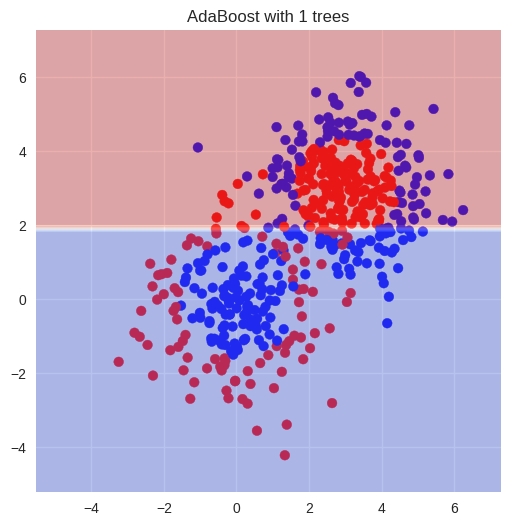

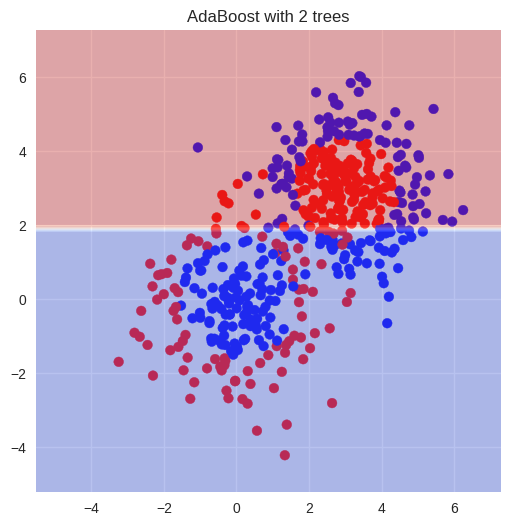

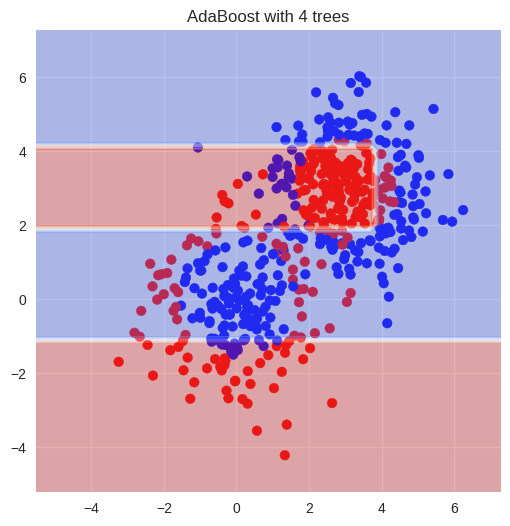

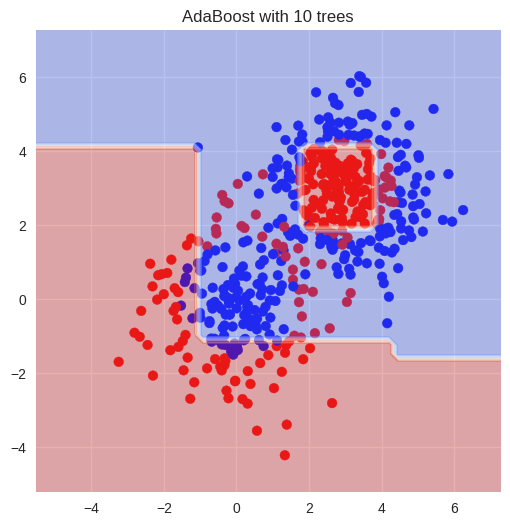

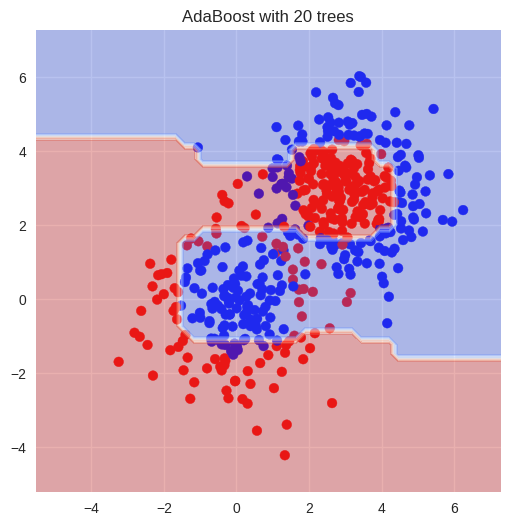

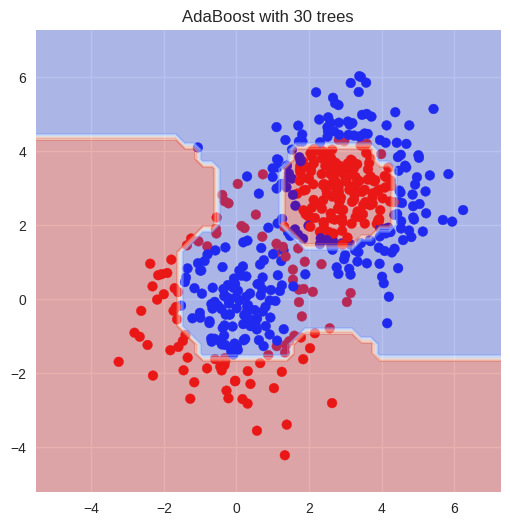

In [ ]:
for n_tree in [1, 2,4,10,20, 30]:
    clf = Adaboost(n_estimators=n_tree)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print (f"Accuracy:", accuracy, f"The number of estimators: {n_tree}")
    plot_adaboost(adaboost=clf)

## Let's plot most important samples based on the last iteration

In [ ]:
ax = plt.figure(figsize=(12, 8)).add_subplot(111)

plt.scatter(X_train[:,1], X_train[:,0], c=y_train)

# YOUR CODE HERE

# END OF YOUR CODE


plt.scatter(X_train[idx][:,1], X_train[idx][:,0], c='r')
plt.title('Most important samples')

Text(0.5, 1.0, 'Most important samples')

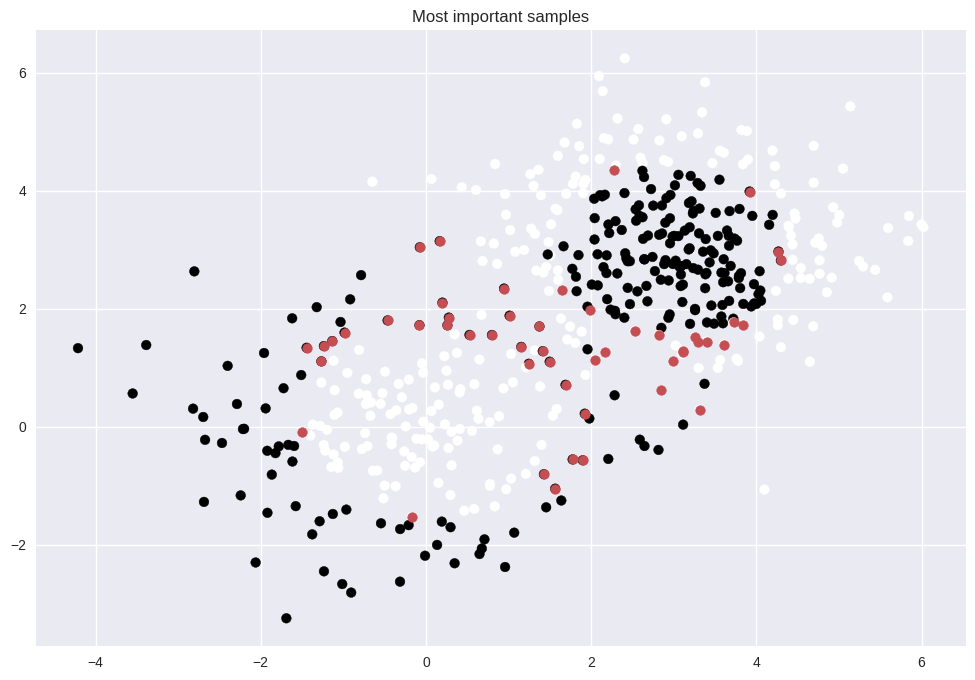

In [ ]:
ax = plt.figure(figsize=(12, 8)).add_subplot(111)

plt.scatter(X_train[:,1], X_train[:,0], c=y_train)

# YOUR CODE HERE
idx = clf.w.argsort()[-50:]
# END OF YOUR CODE


plt.scatter(X_train[idx][:,1], X_train[idx][:,0], c='r')
plt.title('Most important samples')